In [2]:
!pip install pandas
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1755.769
Date:                Fri, 28 Apr 2023   AIC                           3519.539
Time:                        08:07:48   BIC                           3535.105
Sample:                             0   HQIC                          3525.727
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

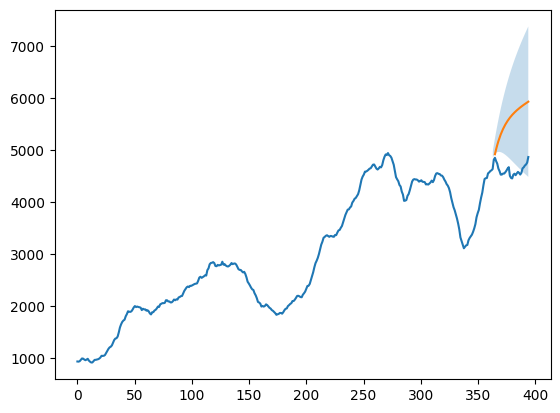

In [3]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
df = pd.read_csv('website_data.csv')
df.info()

#df.plot()
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

df_train_diff = df_train.diff().dropna()
#df_train_diff.plot()

auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
print(auto_arima.summary())

forecast_test_auto, forecast_sigma = auto_arima.predict(n_periods=len(df_test), return_conf_int=True)
low = np.array([i[0] for i in forecast_sigma])
high = np.array([i[1] for i in forecast_sigma])

df['forecast'] = [None]*len(df_train) + list(forecast_test_auto)

x1 = np.linspace(0,394, 393)
x2 = np.linspace(363,394, 30)

train = df['traffic'].to_numpy()
fcst = df['forecast'].to_numpy()
#df.plot()

plt.plot(x1, train, x1, fcst)
plt.fill_between(x2, low, high, alpha = 0.25)

In [4]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 972.7752661403878
mape - auto: 0.21176036272027385
rmse - auto: 1023.6023985269142
